# Homework Problem 0: Making sure you're set up with python
### You will need to be able to run all of these cells without error

In [89]:
import numpy as np
import pandas as pd 
%matplotlib inline

In [90]:
import tqdm


for i in tqdm.tqdm(range(3)):
    print("look at the pretty progress bar")


100%|██████████| 3/3 [00:00<00:00, 18289.12it/s]

look at the pretty progress bar
look at the pretty progress bar
look at the pretty progress bar


In [91]:
# make sure numpy works
arr = np.arange(30).reshape(10, 3)
arr.sum(axis=0)

array([135, 145, 155])

<Axes: >

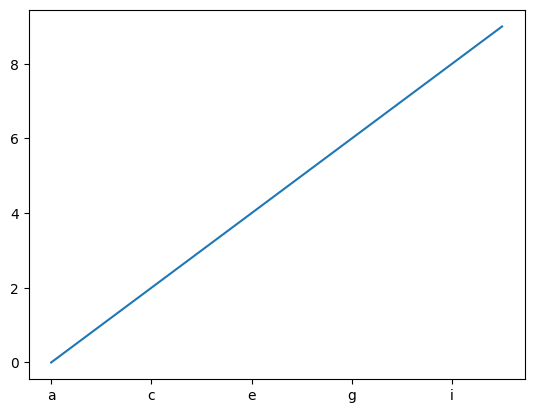

In [92]:
# make sure pandas works
pd.Series(range(10), index=list("abcdefghij")).plot()

In [93]:
# make sure scikit learn works
from sklearn.preprocessing import normalize

arr = np.arange(30).reshape(10, 3)
new_arr = normalize(arr)
(new_arr * new_arr).sum(axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [94]:
from tensorflow.keras.utils import to_categorical

arr = np.array([[1, 2, 1, 0, 5], [3, 4, 1, 0, 5]])
assert to_categorical(arr).shape == (2, 5, 6)

In [95]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
import tensorflow.keras.backend as K
import tensorflow as tf

K.clear_session()
inpt = Input(shape=(10,))
mat = Dense(1, input_shape=(10,))

res = mat(K.variable(np.ones((10, 1))))

if tf.__version__.startswith("1"):
    print(
        f"you have tensorflow version {tf.__version__}."
        "Your code may not be compatible with everything we do in class"
    )
    result = K.eval(res)
else:
    result = res.numpy()
    assert (result == K.eval(res)).all()

print(result)

/Users/bluebird/.pyenv/versions/3.10.11/envs/venv310/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[[-0.1720519]
 [-0.1720519]
 [-0.1720519]
 [-0.1720519]
 [-0.1720519]
 [-0.1720519]
 [-0.1720519]
 [-0.1720519]
 [-0.1720519]
 [-0.1720519]]


In [96]:
K.clear_session()
inpt = Input(shape=(10,))
mat = Dense(1, input_shape=(10,))
outpt = mat(inpt)

model = Model(inpt, outpt)
model.compile("adam", loss="binary_crossentropy")
assert model.count_params() == 11
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11 (44.00 B)

 Trainable params: 11 (44.00 B)

 Non-trainable params: 0 (0.00 B)

# Homework Problem 1: Company Descriptions from Wikipedia
Downloading data from the web is a large part of working with text.
Importantly, it can be difficult to find the __right__ data. 
Here, we will download the company descriptions from wikipedia for the current set of S&P500 companies. 

## The `wikipedia` package
You can install it with `pip install wikipedia`

We will use `wikipeda.page` to grab data
```python
import wikipedia

page = wikipedia.page(page_url)
print(page.content)
```

In [97]:
import numpy as np
import pandas as pd
%matplotlib inline

from tqdm import tqdm
import wikipedia

## Part 0: get the list of the S&P500 companies
### Hint, a `wikipedia` page has a method `html()` which returns the html from the page
### pandas has `read_html` https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.read_html.html

In [98]:
import requests
from bs4 import BeautifulSoup
import json

# URL of the Wikipedia page
url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"

# Send a GET request to the URL
response = requests.get(url)

# Parse the HTML content
soup = BeautifulSoup(response.content, 'html.parser')

# Find the table with class 'wikitable sortable'
table = soup.find('table', {'class': 'wikitable sortable'})

# Initialize a list to store company data
companies = []

# Iterate through table rows, skipping the header
for row in table.find_all('tr')[1:]:
    cols = row.find_all('td')
    if len(cols) >= 8:  # Ensure we have the right table
        
        # Find instances of links in the first two columns
        symbol_link = cols[0].find('a')
        name_link = cols[1].find('a')
        
        company = {
            "symbol": cols[0].text.strip(),
            "name": cols[1].text.strip(),
            "gics_sector": cols[2].text.strip(),
            "gics_sub_sector": cols[3].text.strip(),
            "headquarters": cols[4].text.strip(),
            "date_added": cols[5].text.strip(),
            "cik": cols[6].text.strip(),
            "founded": cols[7].text.strip(),
            "wikipedia_page": f"https://en.wikipedia.org{name_link['href']}" if name_link else None,
            "nyse_page": f"{symbol_link['href']}" if symbol_link else None
        }
        companies.append(company)

print(companies)
print(len(companies))

[{'symbol': 'MMM', 'name': '3M', 'gics_sector': 'Industrials', 'gics_sub_sector': 'Industrial Conglomerates', 'headquarters': 'Saint Paul, Minnesota', 'date_added': '1957-03-04', 'cik': '0000066740', 'founded': '1902', 'wikipedia_page': 'https://en.wikipedia.org/wiki/3M', 'nyse_page': 'https://www.nyse.com/quote/XNYS:MMM'}, {'symbol': 'AOS', 'name': 'A. O. Smith', 'gics_sector': 'Industrials', 'gics_sub_sector': 'Building Products', 'headquarters': 'Milwaukee, Wisconsin', 'date_added': '2017-07-26', 'cik': '0000091142', 'founded': '1916', 'wikipedia_page': 'https://en.wikipedia.org/wiki/A._O._Smith', 'nyse_page': 'https://www.nyse.com/quote/XNYS:AOS'}, {'symbol': 'ABT', 'name': 'Abbott Laboratories', 'gics_sector': 'Health Care', 'gics_sub_sector': 'Health Care Equipment', 'headquarters': 'North Chicago, Illinois', 'date_added': '1957-03-04', 'cik': '0000001800', 'founded': '1888', 'wikipedia_page': 'https://en.wikipedia.org/wiki/Abbott_Laboratories', 'nyse_page': 'https://www.nyse.com

## Part 2: For every S&P500 company, get the page content

In [131]:
import time

# Scrape all pages
for company in tqdm(companies):
    try:
        url = company['wikipedia_page'].split("/")[-1]
        page = wikipedia.page(url, auto_suggest=False)
        company['page_content'] = page.content
        time.sleep(1)
    except Exception as e:
        print(f"Problem using {company['wikipedia_page']}, using search term instead.")
        try:
            page = wikipedia.page(company['name'], auto_suggest=False)
            company['page_content'] = page.content
            time.sleep(1)
        except wikipedia.exceptions.PageError:
            print(f"Page not found for {company['name']}, returning None.")

  9%|▉         | 45/503 [01:05<10:53,  1.43s/it]

Problem using https://en.wikipedia.org/wiki/Arthur_J._Gallagher_%26_Co., using search term instead.


  9%|▉         | 47/503 [01:08<11:08,  1.47s/it]

Problem using https://en.wikipedia.org/wiki/AT%26T, using search term instead.


 12%|█▏        | 59/503 [01:25<11:08,  1.51s/it]

Problem using https://en.wikipedia.org/wiki/Bath_%26_Body_Works,_Inc., using search term instead.


 15%|█▌        | 76/503 [01:50<10:12,  1.44s/it]

Problem using https://en.wikipedia.org/wiki/Brown_%26_Brown, using search term instead.


 15%|█▌        | 77/503 [01:52<10:31,  1.48s/it]

Problem using https://en.wikipedia.org/wiki/Brown%E2%80%93Forman, using search term instead.


 18%|█▊        | 89/503 [02:10<10:02,  1.46s/it]

Problem using https://en.wikipedia.org/wiki/Carnival_Corporation_%26_plc, using search term instead.


 21%|██▏       | 107/503 [02:36<09:32,  1.45s/it]

Problem using https://en.wikipedia.org/wiki/Church_%26_Dwight, using search term instead.


 29%|██▊       | 144/503 [03:30<08:36,  1.44s/it]

Problem using https://en.wikipedia.org/wiki/Deere_%26_Company, using search term instead.


 31%|███       | 154/503 [03:45<08:30,  1.46s/it]

Problem using https://en.wikipedia.org/wiki/Domino%27s, using search term instead.


 36%|███▌      | 180/503 [04:23<06:18,  1.17s/it]

Problem using https://en.wikipedia.org/wiki/The_Est%C3%A9e_Lauder_Companies, using search term instead.
Page not found for Estée Lauder Companies (The), returning None.


 47%|████▋     | 238/503 [05:48<06:20,  1.43s/it]

Problem using https://en.wikipedia.org/wiki/Host_Hotels_%26_Resorts, using search term instead.


 50%|████▉     | 251/503 [06:07<06:06,  1.45s/it]

Problem using https://en.wikipedia.org/w/index.php?title=Insulet_Corporation&action=edit&redlink=1, using search term instead.


 50%|█████     | 252/503 [06:07<04:46,  1.14s/it]

Page not found for Insulet Corporation, returning None.


 50%|█████     | 254/503 [06:10<05:22,  1.30s/it]

Problem using https://en.wikipedia.org/wiki/International_Flavors_%26_Fragrances, using search term instead.


 53%|█████▎    | 265/503 [06:26<05:55,  1.49s/it]

Problem using https://en.wikipedia.org/wiki/Jack_Henry_%26_Associates, using search term instead.


 53%|█████▎    | 267/503 [06:29<05:57,  1.52s/it]

Problem using https://en.wikipedia.org/wiki/Johnson_%26_Johnson, using search term instead.


 59%|█████▉    | 296/503 [07:12<04:59,  1.45s/it]

Problem using https://en.wikipedia.org/wiki/Lowe%27s, using search term instead.


 59%|█████▉    | 299/503 [07:16<05:00,  1.48s/it]

Problem using https://en.wikipedia.org/wiki/M%26T_Bank, using search term instead.


 61%|██████▏   | 309/503 [07:31<04:39,  1.44s/it]

Problem using https://en.wikipedia.org/wiki/McCormick_%26_Company, using search term instead.


 62%|██████▏   | 310/503 [07:33<04:47,  1.49s/it]

Problem using https://en.wikipedia.org/wiki/McDonald%27s, using search term instead.


 62%|██████▏   | 313/503 [07:37<04:39,  1.47s/it]

Problem using https://en.wikipedia.org/wiki/Merck_%26_Co., using search term instead.


 65%|██████▌   | 329/503 [08:01<04:18,  1.49s/it]

Problem using https://en.wikipedia.org/wiki/Moody%27s_Corporation, using search term instead.


 70%|███████   | 353/503 [08:37<03:39,  1.47s/it]

Problem using https://en.wikipedia.org/wiki/O%27Reilly_Auto_Parts, using search term instead.


 74%|███████▍  | 372/503 [09:06<03:20,  1.53s/it]

Problem using https://en.wikipedia.org/wiki/PG%26E, using search term instead.


 76%|███████▌  | 381/503 [09:20<03:01,  1.49s/it]

Problem using https://en.wikipedia.org/wiki/Procter_%26_Gamble, using search term instead.


 81%|████████  | 408/503 [09:59<02:18,  1.46s/it]

Problem using https://en.wikipedia.org/wiki/S%26P_Global, using search term instead.


 84%|████████▍ | 424/503 [10:23<01:55,  1.46s/it]

Problem using https://en.wikipedia.org/wiki/Stanley_Black_%26_Decker, using search term instead.


100%|██████████| 503/503 [12:20<00:00,  1.47s/it]


### Testing

In [139]:
#Check for companies that had an error and store into a new list
error_companies = [company for company in companies if 'page_content' not in company]
print(error_companies)
print(len(error_companies))

[{'symbol': 'EL', 'name': 'Estée Lauder Companies (The)', 'gics_sector': 'Consumer Staples', 'gics_sub_sector': 'Personal Care Products', 'headquarters': 'New York City, New York', 'date_added': '2006-01-05', 'cik': '0001001250', 'founded': '1946', 'wikipedia_page': 'https://en.wikipedia.org/wiki/The_Est%C3%A9e_Lauder_Companies', 'nyse_page': 'https://www.nyse.com/quote/XNYS:EL'}, {'symbol': 'PODD', 'name': 'Insulet Corporation', 'gics_sector': 'Health Care', 'gics_sub_sector': 'Health Care Equipment', 'headquarters': 'Acton, Massachusetts', 'date_added': '2023-03-15', 'cik': '0001145197', 'founded': '2000', 'wikipedia_page': 'https://en.wikipedia.org/w/index.php?title=Insulet_Corporation&action=edit&redlink=1', 'nyse_page': 'https://www.nasdaq.com/market-activity/stocks/podd'}]
2


In [140]:
# Fix the error companies manually
for company in companies: 
    if company['symbol'] == 'EL':
        url = "The_Estée_Lauder_Companies"
        page = wikipedia.page(url, auto_suggest=False)
        company['page_content'] = page.content
    if company['symbol'] == 'PODD':
        company['page_content'] = "No page found"


In [141]:
#Re-check for companies that had an error and store into a new list
error_companies = [company for company in companies if 'page_content' not in company]
print(error_companies)
print(len(error_companies))

[]
0


In [155]:
# Check first 100 characters of the page content for each company and export to a csv file
df = pd.DataFrame(companies)
df['page_content'] = df['page_content'].str[:100]
df.to_csv("companies.csv", index=False)


### Export

In [144]:
# Convert to list JSON and export to file to save
json_data = json.dumps(companies, indent=2)
print(json_data)

# Save to a file
with open('sp500_companies.json', 'w') as f:
    f.write(json_data)

[
  {
    "symbol": "MMM",
    "name": "3M",
    "gics_sector": "Industrials",
    "gics_sub_sector": "Industrial Conglomerates",
    "headquarters": "Saint Paul, Minnesota",
    "date_added": "1957-03-04",
    "cik": "0000066740",
    "founded": "1902",
    "wikipedia_page": "https://en.wikipedia.org/wiki/3M",
    "nyse_page": "https://www.nyse.com/quote/XNYS:MMM",
    "page_content": "3M Company (originally the Minnesota Mining and Manufacturing Company) is an American multinational conglomerate operating in the fields of industry, worker safety, healthcare, and consumer goods. The company produces over 60,000 products under several brands, including adhesives, abrasives, laminates, passive fire protection, personal protective equipment, window films, paint protection films, dental, orthodontic products, electrical, electronic connecting, insulating materials, medical products, car-care products, electronic circuits, healthcare software, and optical films. It is based in Maplewood, a

## Part 3: Content length
 - For every page, compute the length of the text (how many characters)
 - What is the mean length(number of characters) for each gics sector. 

In [145]:
import json
import pandas as pd

# Import json file and convert to DataFrame
with open('sp500_companies.json', 'r') as f:
    companies = json.load(f)

df = pd.DataFrame(companies)
df.head()

symbol                 name             gics_sector  \
0    MMM                   3M             Industrials   
1    AOS          A. O. Smith             Industrials   
2    ABT  Abbott Laboratories             Health Care   
3   ABBV               AbbVie             Health Care   
4    ACN            Accenture  Information Technology   

                  gics_sub_sector             headquarters  date_added  \
0        Industrial Conglomerates    Saint Paul, Minnesota  1957-03-04   
1               Building Products     Milwaukee, Wisconsin  2017-07-26   
2           Health Care Equipment  North Chicago, Illinois  1957-03-04   
3                   Biotechnology  North Chicago, Illinois  2012-12-31   
4  IT Consulting & Other Services          Dublin, Ireland  2011-07-06   

          cik      founded                                     wikipedia_page  \
0  0000066740         1902                   https://en.wikipedia.org/wiki/3M   
1  0000091142         1916          https://en.wikipedia.org/wiki/A._O._Smith   
2  0000001800         1888  https://en.wikipedia.org/wiki/Abbott_Laboratories   
3  0001551152  2013 (1888)               https://en.wikipedia.org/wiki/AbbVie   
4  0001467373         1989            https://en.wikipedia.org/wiki/Accenture   

                              nyse_page  \
0   https://www.nyse.com/quote/XNYS:MMM   
1   https://www.nyse.com/quote/XNYS:AOS   
2   https://www.nyse.com/quote/XNYS:ABT   
3  https://www.nyse.com/quote/XNYS:ABBV   
4   https://www.nyse.com/quote/XNYS:ACN   

                                        page_content  
0  3M Company (originally the Minnesota Mining an...  
1  A. O. Smith Corporation is an American manufac...  
2  Abbott Laboratories is an American multination...  
3  AbbVie Inc. is an American pharmaceutical comp...  
4  Accenture plc is an Irish-American professiona...

In [146]:
# Add a column with the length of the page content to the DataFrame
df['page_length'] = df['page_content'].apply(len)
df.head()


symbol                 name             gics_sector  \
0    MMM                   3M             Industrials   
1    AOS          A. O. Smith             Industrials   
2    ABT  Abbott Laboratories             Health Care   
3   ABBV               AbbVie             Health Care   
4    ACN            Accenture  Information Technology   

                  gics_sub_sector             headquarters  date_added  \
0        Industrial Conglomerates    Saint Paul, Minnesota  1957-03-04   
1               Building Products     Milwaukee, Wisconsin  2017-07-26   
2           Health Care Equipment  North Chicago, Illinois  1957-03-04   
3                   Biotechnology  North Chicago, Illinois  2012-12-31   
4  IT Consulting & Other Services          Dublin, Ireland  2011-07-06   

          cik      founded                                     wikipedia_page  \
0  0000066740         1902                   https://en.wikipedia.org/wiki/3M   
1  0000091142         1916          https://en.wikipedia.org/wiki/A._O._Smith   
2  0000001800         1888  https://en.wikipedia.org/wiki/Abbott_Laboratories   
3  0001551152  2013 (1888)               https://en.wikipedia.org/wiki/AbbVie   
4  0001467373         1989            https://en.wikipedia.org/wiki/Accenture   

                              nyse_page  \
0   https://www.nyse.com/quote/XNYS:MMM   
1   https://www.nyse.com/quote/XNYS:AOS   
2   https://www.nyse.com/quote/XNYS:ABT   
3  https://www.nyse.com/quote/XNYS:ABBV   
4   https://www.nyse.com/quote/XNYS:ACN   

                                        page_content  page_length  
0  3M Company (originally the Minnesota Mining an...        20635  
1  A. O. Smith Corporation is an American manufac...         9148  
2  Abbott Laboratories is an American multination...        20957  
3  AbbVie Inc. is an American pharmaceutical comp...        11840  
4  Accenture plc is an Irish-American professiona...         7304

In [147]:
# Calculate average page length for each sector
sector_avg = df.groupby('gics_sector')['page_length'].mean()

# Print and sort by average page length
print(sector_avg.sort_values(ascending=False))

gics_sector
Communication Services    26492.181818
Consumer Discretionary    20917.788462
Consumer Staples          20316.421053
Information Technology    17859.611940
Financials                17203.098592
Utilities                 13136.096774
Health Care               12407.968254
Energy                    12353.727273
Industrials               11658.705128
Materials                 10201.535714
Real Estate                4292.032258
Name: page_length, dtype: float64


## Part 4: Count how many times `computer` appears in the content for each company
 - What is the mean number of times it occurs in each sector?
 - Do these results make sense

In [148]:
# Count how many times the word 'computer' appears in each page content
df['computer_count'] = df['page_content'].str.count('computer')
df.head()

symbol                 name             gics_sector  \
0    MMM                   3M             Industrials   
1    AOS          A. O. Smith             Industrials   
2    ABT  Abbott Laboratories             Health Care   
3   ABBV               AbbVie             Health Care   
4    ACN            Accenture  Information Technology   

                  gics_sub_sector             headquarters  date_added  \
0        Industrial Conglomerates    Saint Paul, Minnesota  1957-03-04   
1               Building Products     Milwaukee, Wisconsin  2017-07-26   
2           Health Care Equipment  North Chicago, Illinois  1957-03-04   
3                   Biotechnology  North Chicago, Illinois  2012-12-31   
4  IT Consulting & Other Services          Dublin, Ireland  2011-07-06   

          cik      founded                                     wikipedia_page  \
0  0000066740         1902                   https://en.wikipedia.org/wiki/3M   
1  0000091142         1916          https://en.wikipedia.org/wiki/A._O._Smith   
2  0000001800         1888  https://en.wikipedia.org/wiki/Abbott_Laboratories   
3  0001551152  2013 (1888)               https://en.wikipedia.org/wiki/AbbVie   
4  0001467373         1989            https://en.wikipedia.org/wiki/Accenture   

                              nyse_page  \
0   https://www.nyse.com/quote/XNYS:MMM   
1   https://www.nyse.com/quote/XNYS:AOS   
2   https://www.nyse.com/quote/XNYS:ABT   
3  https://www.nyse.com/quote/XNYS:ABBV   
4   https://www.nyse.com/quote/XNYS:ACN   

                                        page_content  page_length  \
0  3M Company (originally the Minnesota Mining an...        20635   
1  A. O. Smith Corporation is an American manufac...         9148   
2  Abbott Laboratories is an American multination...        20957   
3  AbbVie Inc. is an American pharmaceutical comp...        11840   
4  Accenture plc is an Irish-American professiona...         7304   

   computer_count  
0               0  
1               0  
2               0  
3               0  
4               3

In [149]:
# What is the average number of times 'computer' appears in each sector?
sector_computer_avg = df.groupby('gics_sector')['computer_count'].mean()

# Print and sort by average computer count
print(sector_computer_avg.sort_values(ascending=False))

# Yes, these results make sense. 
# The technology sector has the highest average page length and the highest average count of the word 'computer'.

gics_sector
Information Technology    4.223881
Communication Services    0.772727
Consumer Discretionary    0.634615
Industrials               0.487179
Financials                0.239437
Energy                    0.227273
Health Care               0.079365
Consumer Staples          0.078947
Utilities                 0.032258
Materials                 0.000000
Real Estate               0.000000
Name: computer_count, dtype: float64


## Part 5: repeat part 4 with lots of words
 - Try `['computer', 'oil', 'debt', 'drug', 'building', 'food']`
 - Add your own words

In [151]:
original_words = ['computer', 'oil', 'debt', 'drug', 'building', 'food']
new_words = ['finance', 'crypto', 'technology','construction','supercalifragilisticexpialidocious']
words = original_words + new_words
words.sort()
print(words)

['building', 'computer', 'construction', 'crypto', 'debt', 'drug', 'finance', 'food', 'oil', 'supercalifragilisticexpialidocious', 'technology']


In [152]:
# one way to do this is to make a dataframe of counts,
# initialize all to 0, and then loop through and count the occurences
counts = pd.DataFrame(0, index=df.symbol.tolist(), columns=words)

# Append the gics sector to the counts DataFrame
counts['gics_sector'] = df.set_index('symbol')['gics_sector']
counts.head()

building  computer  construction  crypto  debt  drug  finance  food  \
MMM          0         0             0       0     0     0        0     0   
AOS          0         0             0       0     0     0        0     0   
ABT          0         0             0       0     0     0        0     0   
ABBV         0         0             0       0     0     0        0     0   
ACN          0         0             0       0     0     0        0     0   

      oil  supercalifragilisticexpialidocious  technology  \
MMM     0                                   0           0   
AOS     0                                   0           0   
ABT     0                                   0           0   
ABBV    0                                   0           0   
ACN     0                                   0           0   

                 gics_sector  
MMM              Industrials  
AOS              Industrials  
ABT              Health Care  
ABBV             Health Care  
ACN   Information Technology

In [153]:
# Loop through the DataFrame of content and count the occurences of each word
for i, row in df.iterrows():
    for word in words:
        counts.loc[row['symbol'], word] = row['page_content'].count(word)
counts.head()

building  computer  construction  crypto  debt  drug  finance  food  \
MMM          4         0             0       0     1     1        0     3   
AOS          0         0             0       0     0     0        0     0   
ABT          0         0             0       0     0    12        0     0   
ABBV         1         0             0       0     0    16        0     0   
ACN          0         3             0       0     0     0        0     0   

      oil  supercalifragilisticexpialidocious  technology  \
MMM     2                                   0           5   
AOS     8                                   0           0   
ABT     0                                   0           1   
ABBV    0                                   0           3   
ACN     0                                   0           4   

                 gics_sector  
MMM              Industrials  
AOS              Industrials  
ABT              Health Care  
ABBV             Health Care  
ACN   Information Technology

In [154]:
# Show the average count of each word by sector
counts.groupby('gics_sector').mean()

building  computer  construction    crypto      debt  \
gics_sector                                                                    
Communication Services  1.636364  0.772727      0.454545  0.136364  0.954545   
Consumer Discretionary  1.269231  0.634615      0.807692  0.115385  0.538462   
Consumer Staples        0.868421  0.078947      0.263158  0.000000  0.184211   
Energy                  1.045455  0.227273      0.954545  0.000000  0.454545   
Financials              1.676056  0.239437      0.239437  0.267606  0.915493   
Health Care             0.365079  0.079365      0.238095  0.047619  0.269841   
Industrials             1.564103  0.487179      0.807692  0.000000  0.320513   
Information Technology  0.895522  4.223881      0.507463  0.208955  0.134328   
Materials               0.821429  0.000000      0.857143  0.000000  0.107143   
Real Estate             0.838710  0.000000      0.290323  0.000000  0.354839   
Utilities               1.419355  0.032258      1.451613  0.000000  0.548387   

                            drug   finance      food        oil  \
gics_sector                                                       
Communication Services  0.136364  0.363636  0.090909   0.045455   
Consumer Discretionary  0.211538  0.192308  2.634615   0.538462   
Consumer Staples        0.657895  0.052632  7.815789   2.157895   
Energy                  0.045455  0.090909  0.136364  14.136364   
Financials              0.098592  0.929577  0.169014   0.535211   
Health Care             5.571429  0.063492  0.253968   0.126984   
Industrials             0.076923  0.128205  0.230769   0.679487   
Information Technology  0.059701  0.238806  0.104478   0.134328   
Materials               0.035714  0.107143  1.214286   1.250000   
Real Estate             0.000000  0.096774  0.032258   0.032258   
Utilities               0.000000  0.193548  0.000000   1.387097   

                        supercalifragilisticexpialidocious  technology  
gics_sector                                                             
Communication Services                                 0.0    2.045455  
Consumer Discretionary                                 0.0    1.615385  
Consumer Staples                                       0.0    0.421053  
Energy                                                 0.0    0.636364  
Financials                                             0.0    1.070423  
Health Care                                            0.0    1.952381  
Industrials                                            0.0    1.371795  
Information Technology                                 0.0    4.820896  
Materials                                              0.0    1.107143  
Real Estate                                            0.0    0.161290  
Utilities                                              0.0    0.967742